In [1]:
import pyextremes
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
index = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/all_all_nonstd.nc")

In [3]:
import src.Teleconnection.tools as tools

In [4]:
index = tools.standardize(index)

In [5]:
NAO = index.sel(hlayers = 50000, mode = 'NAO').pc

In [6]:
NAO['time'] = NAO.indexes['time'].to_datetimeindex()

/tmp/ipykernel_3489090/1583384904.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  NAO['time'] = NAO.indexes['time'].to_datetimeindex()


In [7]:
xr.corr(NAO.isel(ens = 0), NAO.isel(ens = 1))

<xarray.DataArray 'pc' ()>
array(-0.12828352)
Coordinates:
    hlayers  float64 5e+04
    mode     <U3 'NAO'

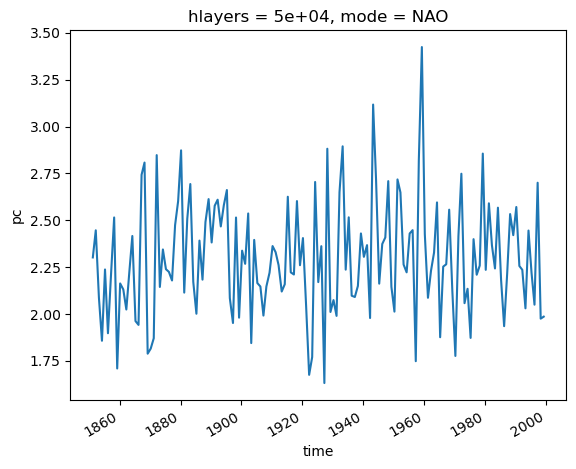

In [8]:
NAO.max(dim = 'ens').plot()

In [9]:
import pyextremes

In [10]:
from pyextremes import get_extremes, get_return_periods

In [11]:
from pyextremes import EVA

In [12]:
all_extreme = NAO.max(dim = 'ens').to_dataframe()['pc']

In [13]:
all_return_periods = get_return_periods(
    ts=all_extreme,
    extremes=all_extreme,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D",
    return_period_size="365.2425D",
    plotting_position="cunnane",
)
all_return_periods.sort_values("return period", ascending=False).head()

,pc,exceedance probability,return period
time,,,
1959-03-16 11:52:00,3.424185,0.004021,248.666667
1943-03-16 11:52:00,3.117376,0.010724,93.250000
1933-03-16 11:52:00,2.894565,0.017426,57.384615
1928-03-03 23:52:00,2.881654,0.024129,41.444444
1880-03-03 23:52:00,2.873070,0.030831,32.434783


In [14]:
all_return_periods.sort_values("return period", ascending=False)

,pc,exceedance probability,return period
time,,,
1959-03-16 11:52:00,3.424185,0.004021,248.666667
1943-03-16 11:52:00,3.117376,0.010724,93.250000
1933-03-16 11:52:00,2.894565,0.017426,57.384615
1928-03-03 23:52:00,2.881654,0.024129,41.444444
1880-03-03 23:52:00,2.873070,0.030831,32.434783
...,...,...,...
1923-03-16 11:52:00,1.770301,0.969169,1.031812
1957-03-16 11:52:00,1.748263,0.975871,1.024725
1859-03-16 11:52:00,1.709407,0.982574,1.017735


In [15]:
first_extrmes = NAO.sel(time = slice('1850','1860')).max(dim = 'ens').to_dataframe()['pc']

In [16]:
first_return_periods = get_return_periods(
    ts=first_extrmes,
    extremes=first_extrmes,
    extremes_method="BM",
    extremes_type="low",
    block_size="365.2425D",
    return_period_size="365.2425D",
    plotting_position="cunnane",
)
first_return_periods.sort_values("return period", ascending=False).head()

,pc,exceedance probability,return period
time,,,
1859-03-16 11:52:00,1.709407,0.058824,17.000000
1854-03-16 11:52:00,1.857287,0.156863,6.375000
1856-03-03 23:52:00,1.897405,0.254902,3.923077
1853-03-16 11:52:00,2.086981,0.352941,2.833333
1860-03-03 23:52:00,2.163130,0.450980,2.217391


In [17]:
first_return_periods.sort_values("return period", ascending=False)

,pc,exceedance probability,return period
time,,,
1859-03-16 11:52:00,1.709407,0.058824,17.000000
1854-03-16 11:52:00,1.857287,0.156863,6.375000
1856-03-03 23:52:00,1.897405,0.254902,3.923077
1853-03-16 11:52:00,2.086981,0.352941,2.833333
1860-03-03 23:52:00,2.163130,0.450980,2.217391
1857-03-16 11:52:00,2.218939,0.549020,1.821429
1855-03-16 11:52:00,2.237606,0.647059,1.545455
1851-03-16 11:52:00,2.301832,0.745098,1.342105
1852-03-03 23:52:00,2.446520,0.843137,1.186047


In [18]:
last_extremes = NAO.sel(time = slice('1989','1999')).max(dim = 'ens').to_dataframe()['pc']

In [19]:
last_return_periods = get_return_periods(
    ts=last_extremes,
    extremes=last_extremes,
    extremes_method="BM",
    extremes_type="low",
    block_size="365.2425D",
    return_period_size="365.2425D",
    plotting_position="cunnane",
)
last_return_periods.sort_values("return period", ascending=False)

,pc,exceedance probability,return period
time,,,
1998-03-16 11:52:00,1.975219,0.053571,18.666667
1999-03-16 11:52:00,1.985946,0.142857,7.000000
1993-03-16 11:52:00,2.030279,0.232143,4.307692
1996-03-03 23:52:00,2.049780,0.321429,3.111111
1995-03-16 11:52:00,2.219427,0.410714,2.434783
1992-03-03 23:52:00,2.235638,0.500000,2.000000
1991-03-16 11:52:00,2.256286,0.589286,1.696970
1989-03-16 11:52:00,2.420669,0.678571,1.473684
1994-03-16 11:52:00,2.445306,0.767857,1.302326


<AxesSubplot:xlabel='return period'>

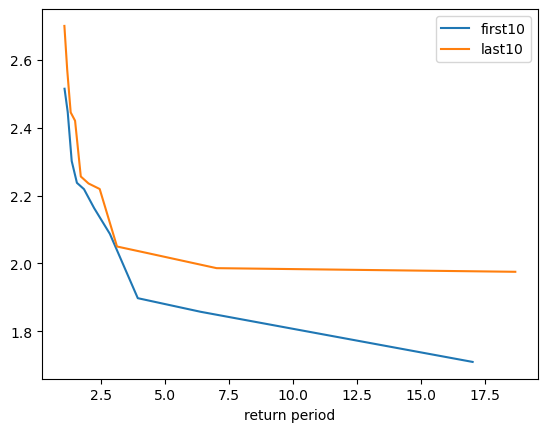

In [20]:
ax = plt.subplot()
first_return_periods.sort_values("return period", ascending=False).plot(x = 'return period',y = 'pc',kind = 'line',ax = ax,label = 'first10')
last_return_periods.sort_values("return period", ascending=False).plot(x = 'return period',y = 'pc',kind = 'line',ax = ax,label = 'last10')


In [21]:
all_return_periods

,pc,exceedance probability,return period
time,,,
1851-03-16 11:52:00,2.301832,0.446381,2.240240
1852-03-03 23:52:00,2.446520,0.285523,3.502347
1853-03-16 11:52:00,2.086981,0.761394,1.313380
1854-03-16 11:52:00,1.857287,0.935657,1.068768
1855-03-16 11:52:00,2.237606,0.520107,1.922680
...,...,...,...
1995-03-16 11:52:00,2.219427,0.587131,1.703196
1996-03-03 23:52:00,2.049780,0.794906,1.258010
1997-03-16 11:52:00,2.700349,0.104558,9.564103


In [22]:
first10_all_return_periods = all_return_periods.loc['1850':'1860']

In [23]:
first10_all_return_periods.sort_values("return period", ascending=False)

,pc,exceedance probability,return period
time,,,
1858-03-16 11:52:00,2.515081,0.238606,4.191011
1852-03-03 23:52:00,2.446520,0.285523,3.502347
1851-03-16 11:52:00,2.301832,0.446381,2.240240
1855-03-16 11:52:00,2.237606,0.520107,1.922680
1857-03-16 11:52:00,2.218939,0.593834,1.683973
1860-03-03 23:52:00,2.163130,0.660858,1.513185
1853-03-16 11:52:00,2.086981,0.761394,1.313380
1856-03-03 23:52:00,1.897405,0.908847,1.100295
1854-03-16 11:52:00,1.857287,0.935657,1.068768


In [24]:
last10_all_return_periods = all_return_periods.loc['1989':'1999']

In [25]:
last10_all_return_periods.sort_values("return period", ascending=False)

,pc,exceedance probability,return period
time,,,
1997-03-16 11:52:00,2.700349,0.104558,9.564103
1990-03-16 11:52:00,2.570850,0.198391,5.040541
1994-03-16 11:52:00,2.445306,0.292225,3.422018
1989-03-16 11:52:00,2.420669,0.319035,3.134454
1991-03-16 11:52:00,2.256286,0.493298,2.027174
1992-03-03 23:52:00,2.235638,0.533512,1.874372
1995-03-16 11:52:00,2.219427,0.587131,1.703196
1996-03-03 23:52:00,2.049780,0.794906,1.258010
1993-03-16 11:52:00,2.030279,0.808311,1.237148


(0.0, 20.0)

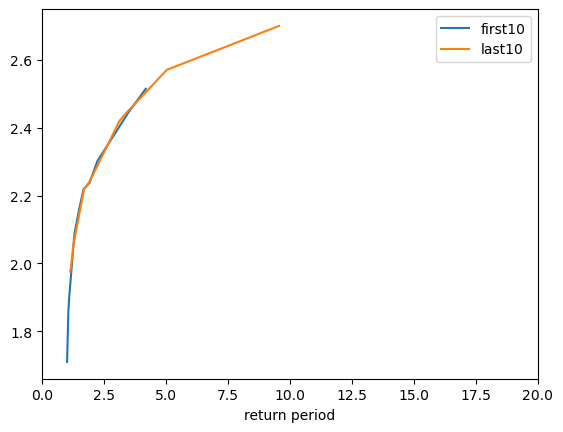

In [28]:
ax = plt.subplot()
first10_all_return_periods.sort_values("return period", ascending=False).plot(x = 'return period',y = 'pc',kind = 'line',ax = ax,label = 'first10')
last10_all_return_periods.sort_values("return period", ascending=False).plot(x = 'return period',y = 'pc',kind = 'line',ax = ax,label = 'last10')
ax.set_xlim(0,20)


# Try EVT

In [38]:
from pyextremes import EVA

In [39]:
ex = NAO.isel(ens = 0)

In [40]:
ex = ex.to_dataframe()['pc']

In [41]:
model = EVA(ex,)

In [42]:
kwargs = {
        # 'extremes_method':"BM",
        'extremes_type':"high",
        'block_size':"365.2425D",
        # 'return_period_size':"365.2425D",
        # 'plotting_position':"cunnane",
}

In [43]:
all_extreme

time
1851-03-16 11:52:00    2.301832
1852-03-03 23:52:00    2.446520
1853-03-16 11:52:00    2.086981
1854-03-16 11:52:00    1.857287
1855-03-16 11:52:00    2.237606
                         ...   
1995-03-16 11:52:00    2.219427
1996-03-03 23:52:00    2.049780
1997-03-16 11:52:00    2.700349
1998-03-16 11:52:00    1.975219
1999-03-16 11:52:00    1.985946
Name: pc, Length: 149, dtype: float64

In [44]:
model = model.from_extremes(all_extreme,
    method = 'BM',
    **kwargs
    )

In [45]:
model.extremes_type

'high'

In [46]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            pc      Size:                                 149
Start:                         March 1851      End:                           March 1999
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                149      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

In [47]:
model.fit_model()

In [48]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                            pc      Size:                                 149
Start:                         March 1851      End:                           March 1999
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                149      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

In [49]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [50]:
print(summary)

               return value  lower ci  upper ci
return period                                  
1.0                    -inf       NaN       NaN
2.0                2.272823  2.224379  2.331984
5.0                2.548873  2.485557  2.612737
10.0               2.707896  2.623010  2.786388
25.0               2.885283  2.749849  2.993876
50.0               3.001786  2.818855  3.133933
100.0              3.106104  2.871177  3.266209
250.0              3.228091  2.927283  3.441377
500.0              3.309869  2.959143  3.565986
1000.0             3.383660  2.983478  3.685388


(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='pc'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='pc', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

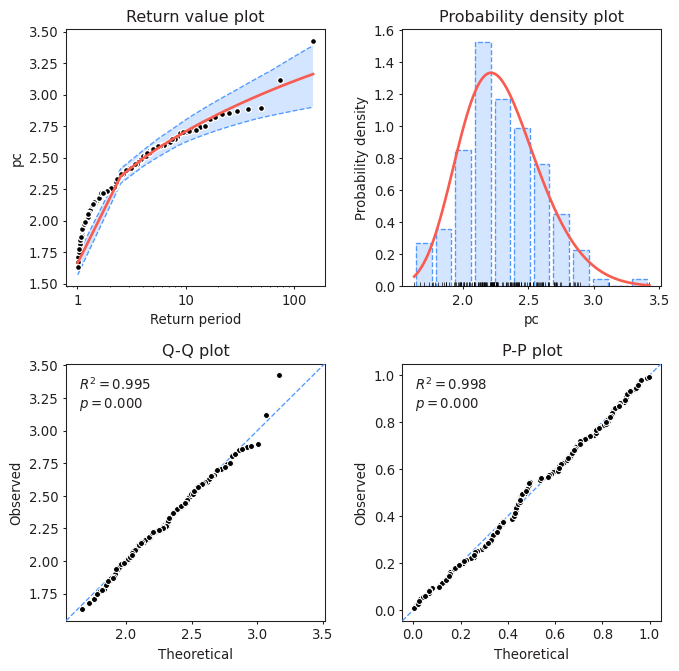

In [51]:
model.plot_diagnostic(alpha=0.95)